In [75]:
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt
from read_experiments import average_runs, load_exp_df

pplt.rc.update({'font.size': 10})

# Basic learning curves

Note that balloon colors have expected popping sizes of 0.2, 0.5, 0.8 for red, yellow, orange. 

The 1 color trials only use yellow, so have expected value of 0.5

The 3 color trials also end up with the same expected value

Realistically since the inflation steps are discrete and with a speed of 0.05, the optimal inflations are going to be slightly lower

## Color, batch, processes

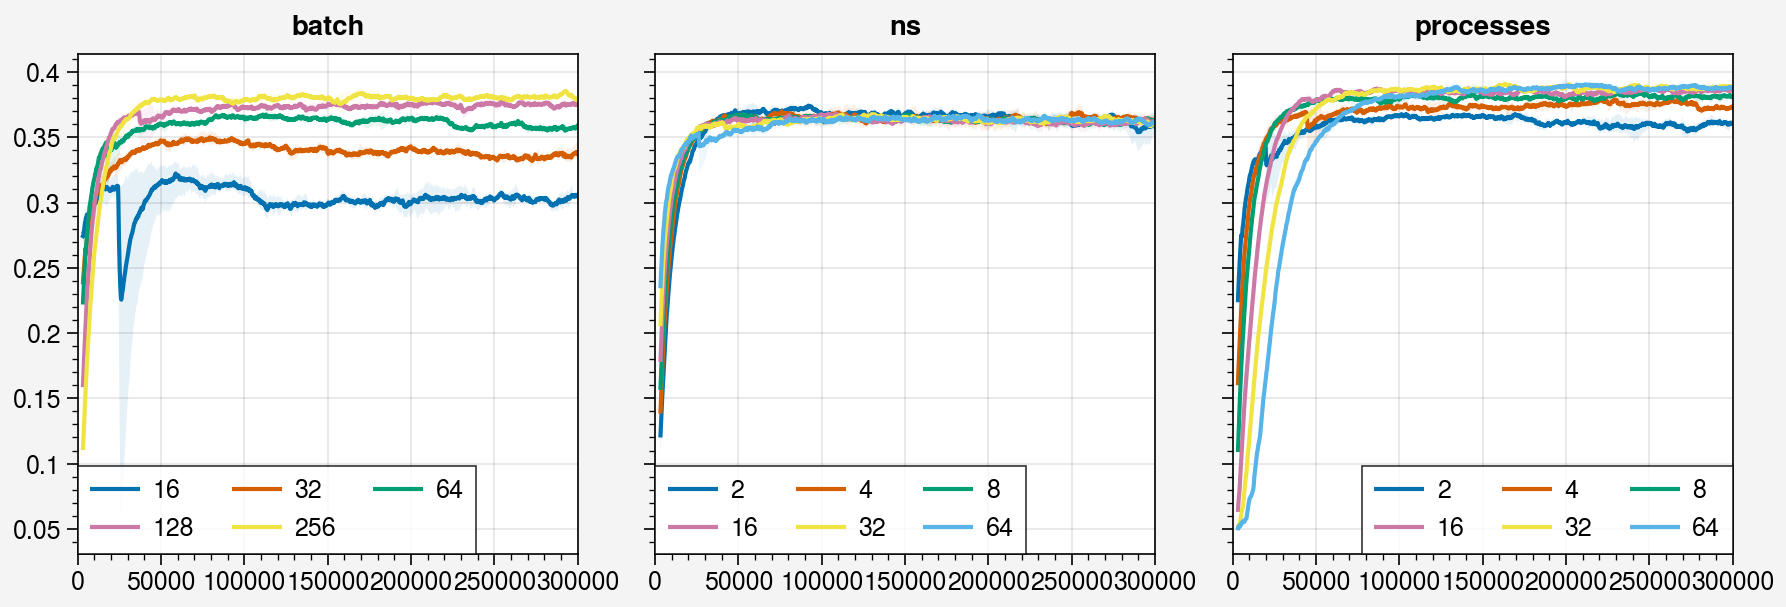

In [8]:
experiments = {
    'batch': {'key': 'bs{batch}', 'vals': [16, 32, 64, 128, 256]},
    'ns': {'key': 'ns{ns}', 'vals': [2, 4, 8, 16, 32, 64]},
    'processes': {'key': 'nump{processes}', 'vals': [2, 4, 8, 16, 32, 64]},
}

color = 1
title = []
fig, ax = pplt.subplots(ncols=3)
for i, exp in enumerate(experiments):
    for j, val in enumerate(experiments[exp]['vals']):
        formatter = {exp: val}
        exp_substr = experiments[exp]['key'].format(**formatter)
        exp_name = f'basics/{color}color_mlp_{exp_substr}'
        average_runs(exp_name, ewm=0.001, ax=ax[i], label=f'{val}')
        title.append(str(val))
    ax[i].legend()
ax.format(toplabels=experiments.keys(), xlim=[0, 300_000])



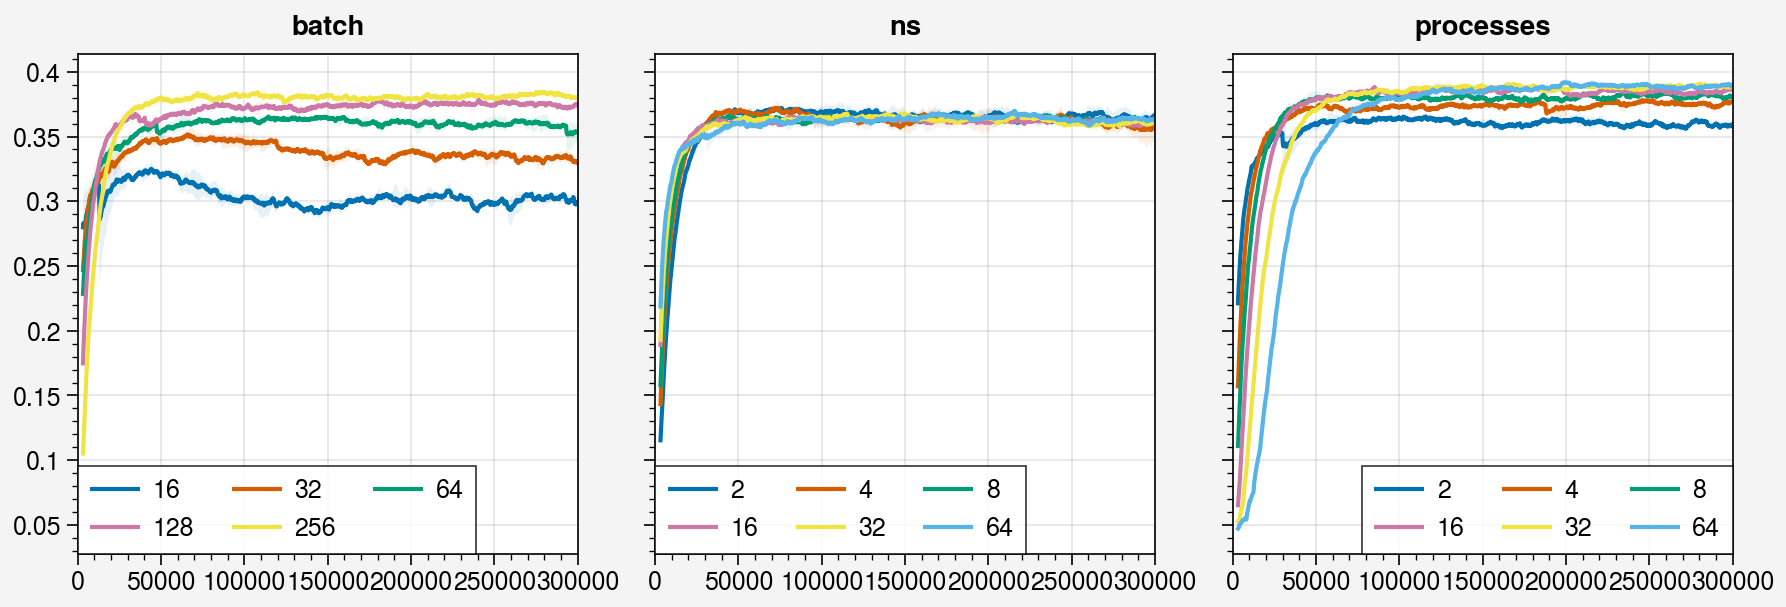

In [9]:
experiments = {
    'batch': {'key': 'bs{batch}', 'vals': [16, 32, 64, 128, 256]},
    'ns': {'key': 'ns{ns}', 'vals': [2, 4, 8, 16, 32, 64]},
    'processes': {'key': 'nump{processes}', 'vals': [2, 4, 8, 16, 32, 64]},
}

color = 3
title = []
fig, ax = pplt.subplots(ncols=3)
for i, exp in enumerate(experiments):
    for j, val in enumerate(experiments[exp]['vals']):
        formatter = {exp: val}
        exp_substr = experiments[exp]['key'].format(**formatter)
        exp_name = f'basics/{color}color_mlp_{exp_substr}'
        average_runs(exp_name, ewm=0.001, ax=ax[i], label=f'{val}')
        title.append(str(val))
    ax[i].legend()
ax.format(toplabels=experiments.keys(), xlim=[0, 300_000])

### More num processes

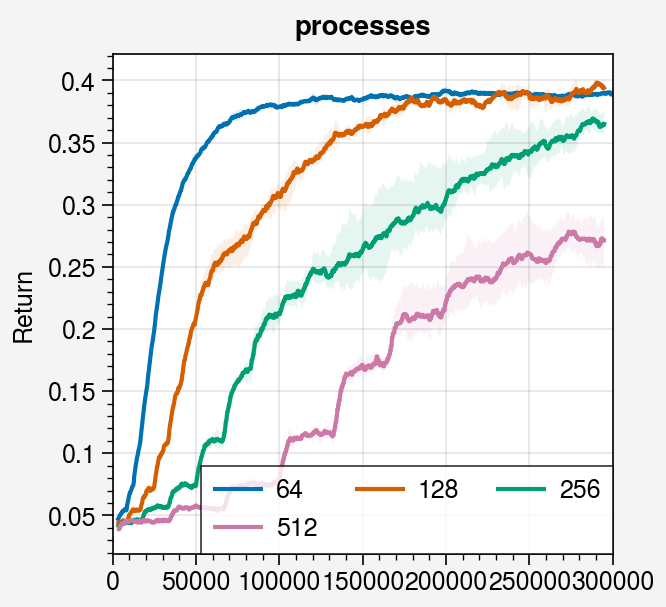

In [15]:
experiments = {
    'processes': {'key': 'nump{processes}', 'vals': [64, 128, 256, 512]},
}

color = 3
title = []
fig, ax = pplt.subplots()
for i, exp in enumerate(experiments):
    for j, val in enumerate(experiments[exp]['vals']):
        formatter = {exp: val}
        exp_substr = experiments[exp]['key'].format(**formatter)
        exp_name = f'basics/{color}color_mlp_{exp_substr}'
        average_runs(exp_name, ewm=0.001, ax=ax, label=f'{val}')
        title.append(str(val))
    ax[i].legend()
ax.format(toplabels=experiments.keys(), xlim=[0, 300_000], ylabel='Return')

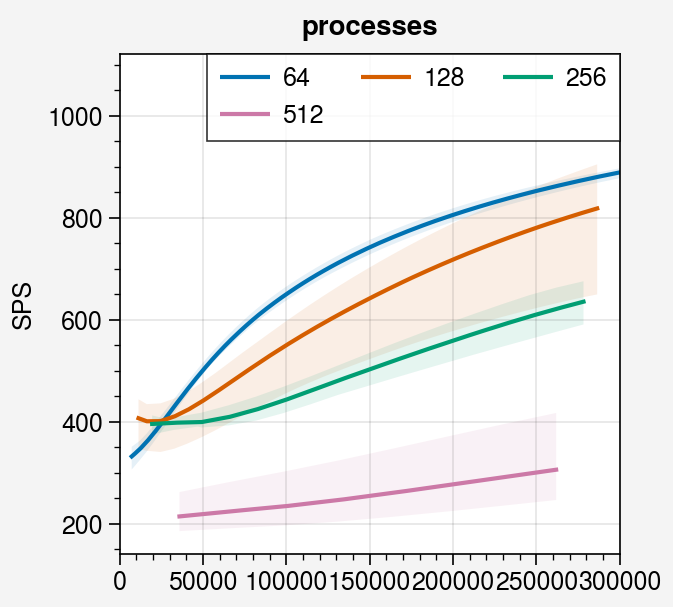

In [16]:
experiments = {
    'processes': {'key': 'nump{processes}', 'vals': [64, 128, 256, 512]},
}

color = 3
title = []
fig, ax = pplt.subplots()
for i, exp in enumerate(experiments):
    for j, val in enumerate(experiments[exp]['vals']):
        formatter = {exp: val}
        exp_substr = experiments[exp]['key'].format(**formatter)
        exp_name = f'basics/{color}color_mlp_{exp_substr}'
        average_runs(exp_name, 'charts/SPS', ewm=0.001, ax=ax, label=f'{val}')
        title.append(str(val))
    ax[i].legend()
ax.format(toplabels=experiments.keys(), xlim=[0, 300_000], ylabel='SPS')

### Num mini batch

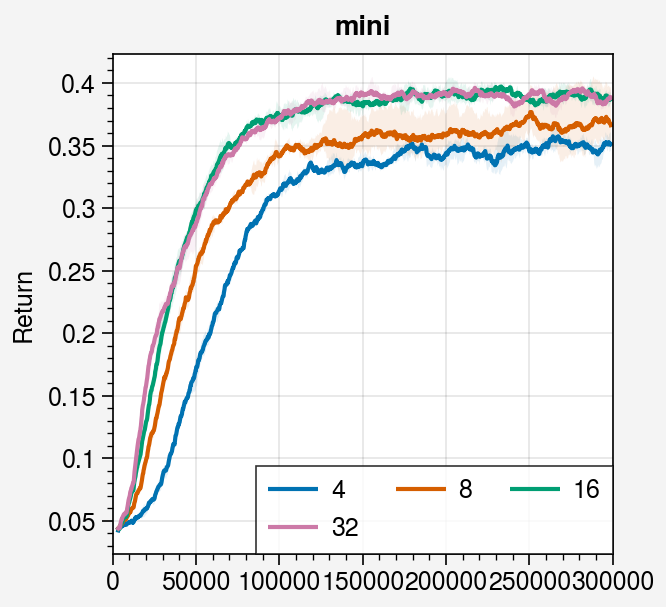

In [18]:
experiments = {
    'mini': {'key': 'minib{mini}', 'vals': [4, 8, 16, 32]},
}

color = 3
title = []
fig, ax = pplt.subplots()
for i, exp in enumerate(experiments):
    for j, val in enumerate(experiments[exp]['vals']):
        formatter = {exp: val}
        exp_substr = experiments[exp]['key'].format(**formatter)
        exp_name = f'basics/{color}color_mlp_{exp_substr}'
        average_runs(exp_name, ewm=0.001, ax=ax, label=f'{val}')
        title.append(str(val))
    ax[i].legend()
ax.format(toplabels=experiments.keys(), xlim=[0, 300_000], ylabel='Return')

### SPS

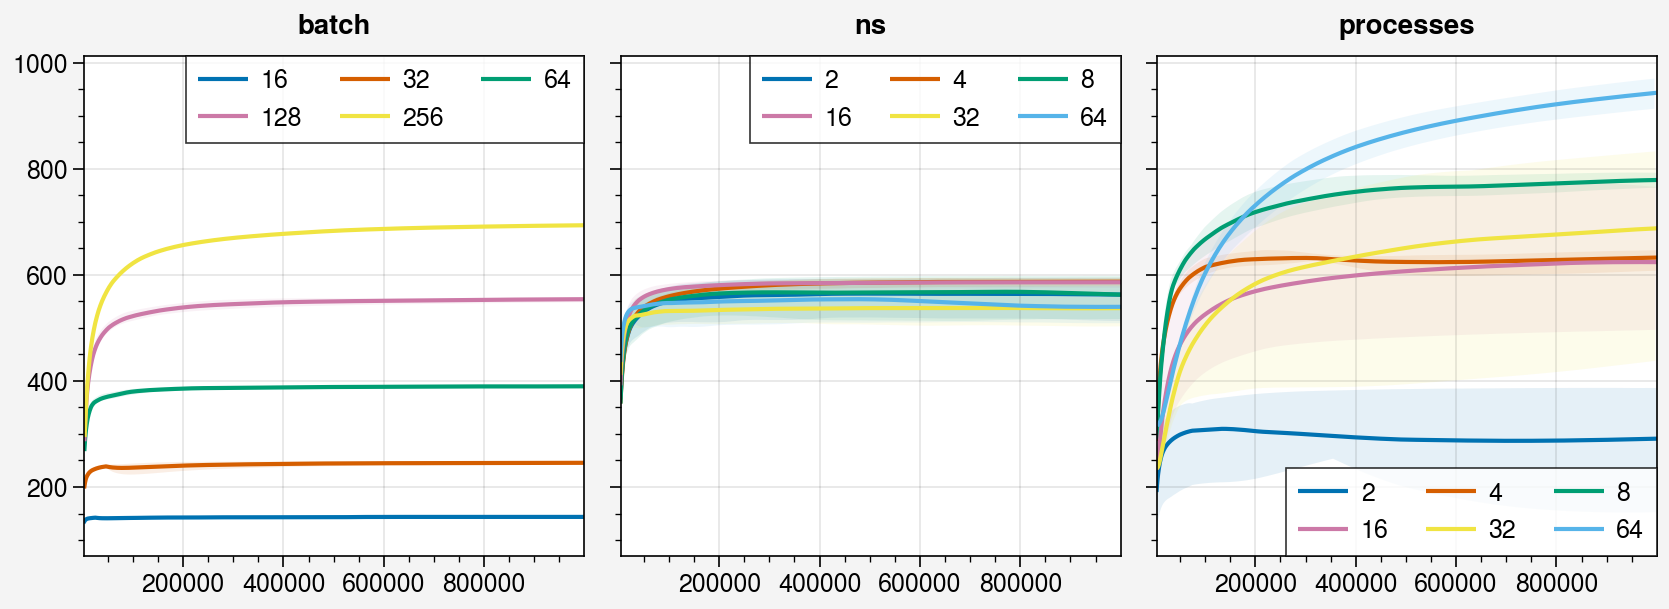

In [ ]:
experiments = {
    'batch': {'key': 'bs{batch}', 'vals': [16, 32, 64, 128, 256]},
    'ns': {'key': 'ns{ns}', 'vals': [2, 4, 8, 16, 32, 64]},
    'processes': {'key': 'nump{processes}', 'vals': [2, 4, 8, 16, 32, 64]},
}

color = 1
title = []
fig, ax = pplt.subplots(ncols=3, sharey=True)
for i, exp in enumerate(experiments):
    for j, val in enumerate(experiments[exp]['vals']):
        formatter = {exp: val}
        exp_substr = experiments[exp]['key'].format(**formatter)
        exp_name = f'basics/{color}color_mlp_{exp_substr}'
        average_runs(exp_name, metric='charts/SPS', ewm=0.001, ax=ax[i], label=f'{val}')
        title.append(str(val))
    ax[i].legend()
ax.format(toplabels=experiments.keys())

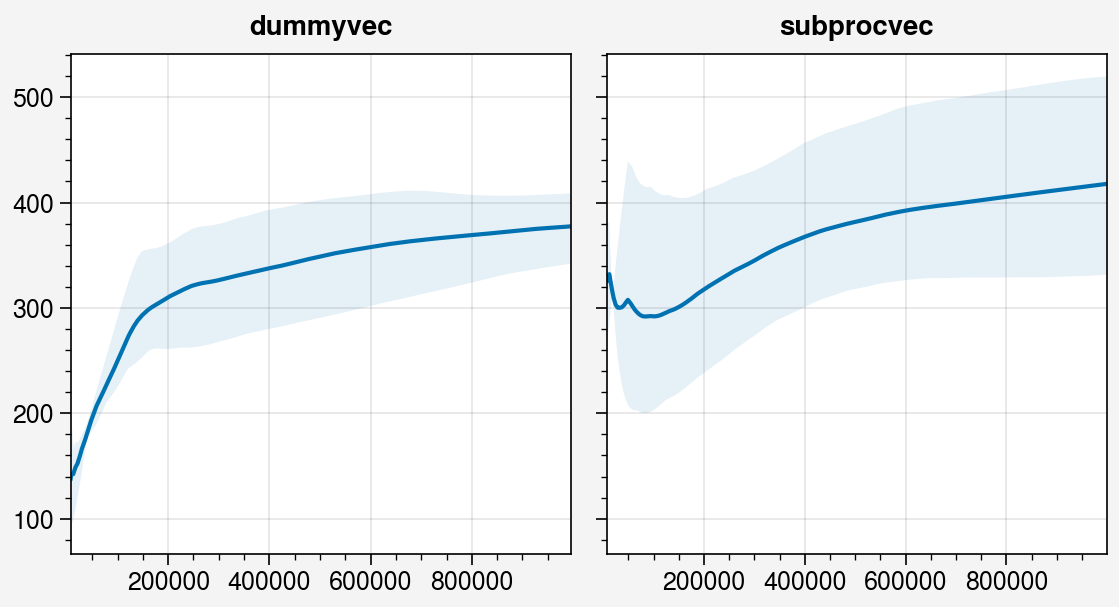

In [ ]:
vec_types = ['dummyvec', 'subprocvec']
fig, ax = pplt.subplots(ncols=2)
for i, vec in enumerate(vec_types):
    exp_name = f'rnn/rnn_{vec}'
    average_runs(exp_name, metric='charts/SPS', ewm=0.001, ax=ax[i])
ax.format(toplabels=vec_types)

## RNN

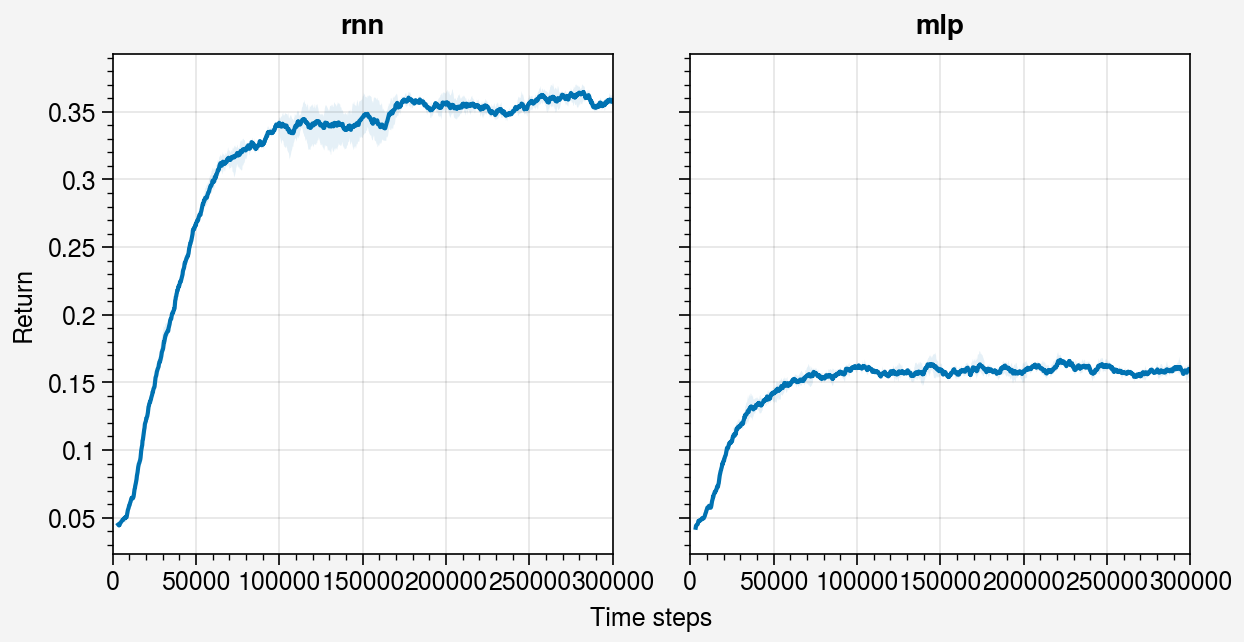

In [ ]:
network_types = ['rnn', 'mlp']
fig, ax = pplt.subplots(ncols=2)
for i, net_type in enumerate(network_types):
    exp_name = f'rnn/memory_{net_type}'
    average_runs(exp_name, ewm=0.001, ax=ax[i], label=net_type)
ax.format(toplabels=network_types, xlabel='Time steps', ylabel='Return', xlim=[0, 300000])

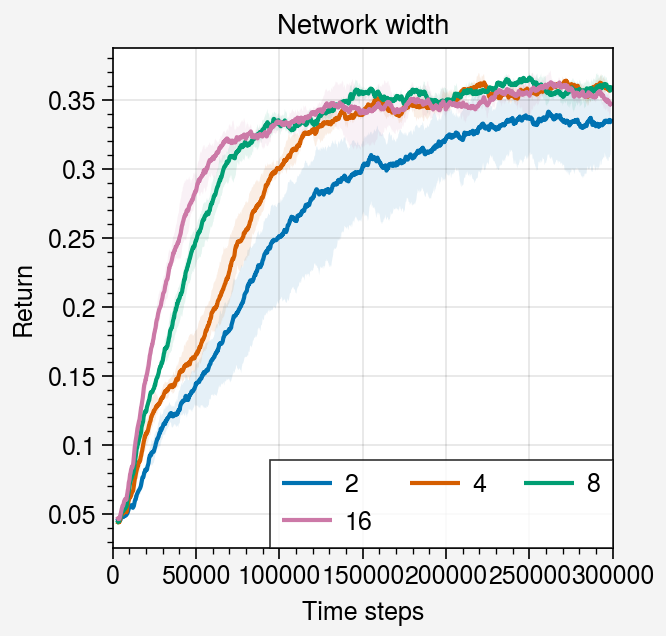

In [28]:
network_sizes = [2, 4, 8, 16]
fig, ax = pplt.subplots()
for i, ns in enumerate(network_sizes):
    exp_name = f'rnn/memory_ns{ns}'
    average_runs(exp_name, ewm=0.001, ax=ax, label=f'{ns}')
ax.legend()
ax.format(xlim=[0, 300_000], title='Network width', ylabel='Return',
          xlabel='Time steps')

## Toggle

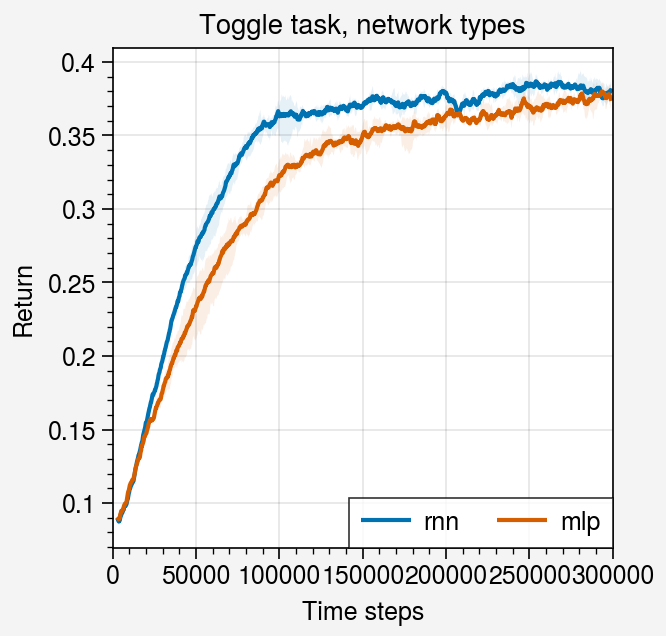

In [30]:
network_types = ['rnn', 'mlp']
fig, ax = pplt.subplots()
for i, net_type in enumerate(network_types):
    exp_name = f'toggle/toggle_{net_type}'
    average_runs(exp_name, ewm=0.001, label=net_type, ax=ax)
ax.legend()
ax.format(title='Toggle task, network types',
          xlabel='Time steps', ylabel='Return', xlim=[0, 300000])

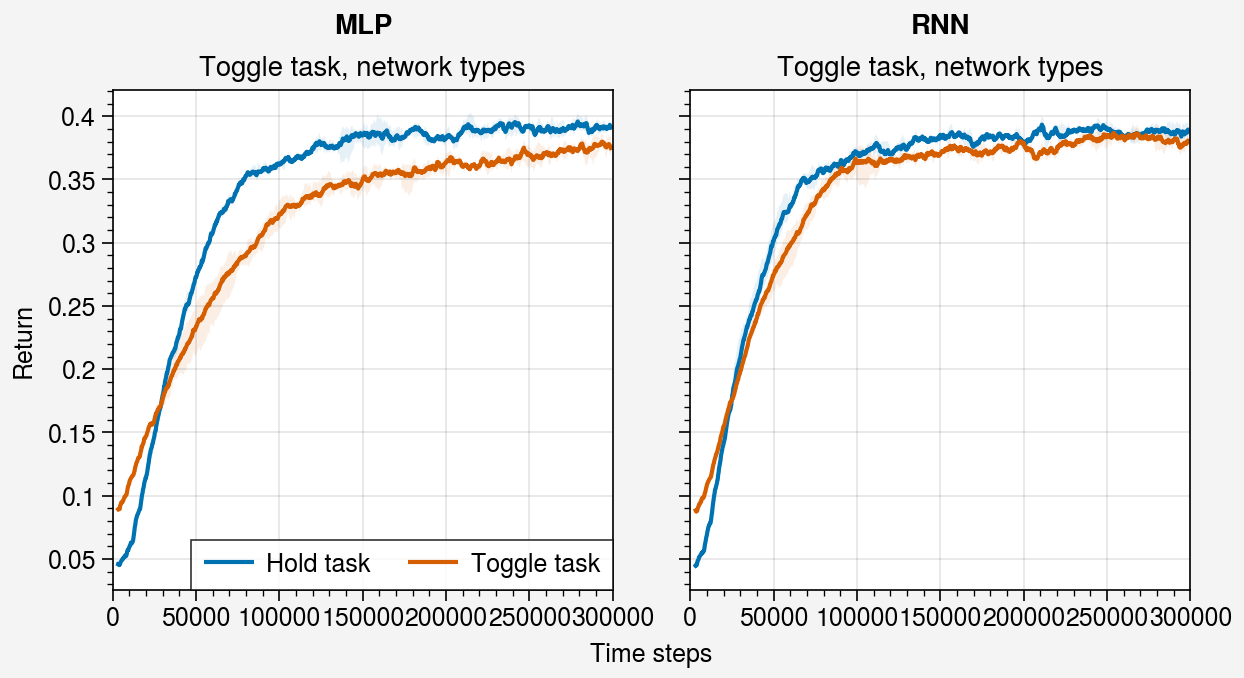

In [6]:
exp_types = ['3color', 'toggle']
net_types = ['mlp', 'rnn']
labels = ['Hold task', 'Toggle task']
fig, ax = pplt.subplots(ncols=2)
for i, net_type in enumerate(net_types):
    for j, exp_type in enumerate(exp_types):
        exp_name = f'toggle/{exp_type}_{net_type}'
        average_runs(exp_name, ewm=0.001, label=labels[j], ax=ax[i])
ax[0].legend()
ax.format(title='Toggle task, network types',
          toplabels=['MLP', 'RNN'],
          xlabel='Time steps', ylabel='Return', xlim=[0, 300000])

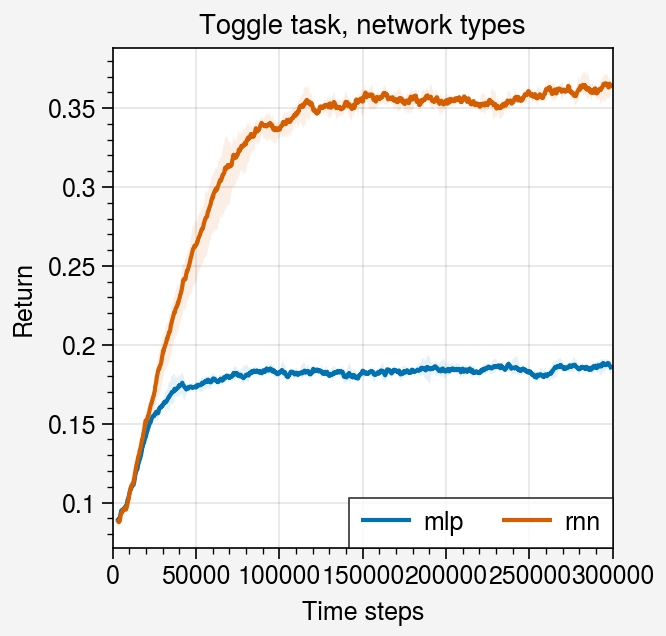

In [8]:
net_types = ['mlp', 'rnn']
fig, ax = pplt.subplots()
for i, net_type in enumerate(net_types):
    exp_name = f'toggle/togglemem_{net_type}'
    average_runs(exp_name, ewm=0.001, label=net_types[i], ax=ax)
ax.legend()
ax.format(title='Toggle task, network types',
          xlabel='Time steps', ylabel='Return', xlim=[0, 300000])

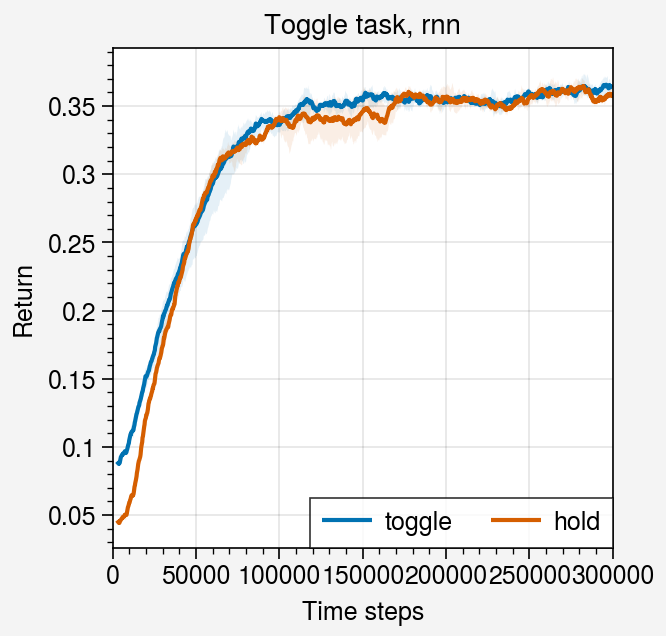

In [15]:
task_types = ['toggle', 'hold']
exp_names = ['toggle/togglemem_rnn', 'rnn/memory_rnn']
fig, ax = pplt.subplots()
for i, exp_name in enumerate(exp_names):
    average_runs(exp_name, ewm=0.001, label=task_types[i], ax=ax)
ax.legend()
ax.format(title='Toggle task, rnn',
          xlabel='Time steps', ylabel='Return', xlim=[0, 300000])

# Behavioral Curves

In [3]:
df = load_exp_df('basics/3color_test', trial_num=0)

In [18]:
df['metric'].unique()

array(['charts/episodic_return', 'charts/episodic_length',
       'charts/episodic_bonus_rewards', 'bart/color', 'bart/size',
       'bart/popped', 'charts/learning_rate', 'losses/value_loss',
       'losses/policy_loss', 'losses/auxiliary_loss', 'losses/entropy',
       'losses/approx_kl', 'losses/clipfrac', 'charts/SPS'], dtype=object)

In [69]:

color_to_idx = {"red": 0, "yellow": 1, "orange": 2,
                        "gray": 4, "purple": 4}
idx_to_color = {0: "red", 1: "yellow", 2: "orange",
                            3: "gray", 4: "purple"}
bart_plot_colors = ['deep red', 'orange', 'goldenrod']

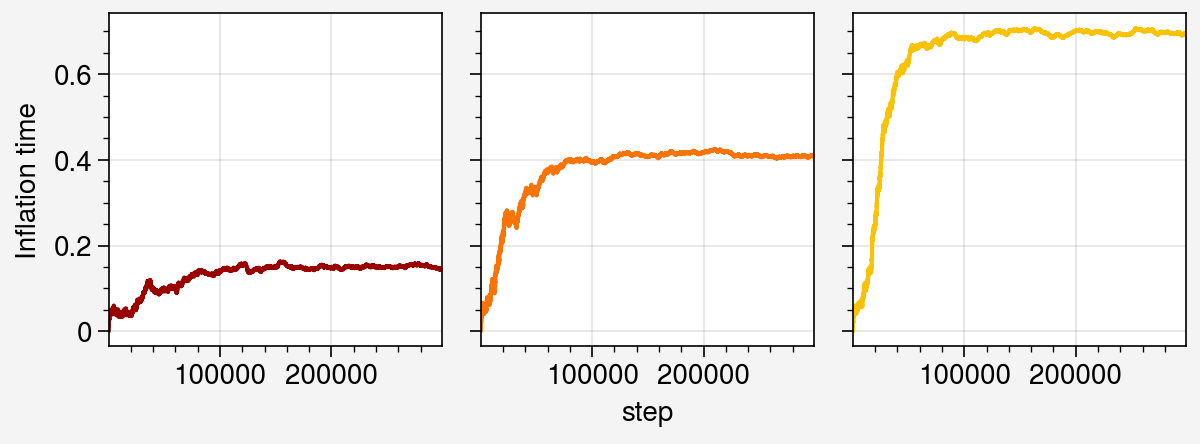

In [78]:
colors = [0, 1, 2]
fig, ax = pplt.subplots(ncols=len(colors), figwidth=6)
metric_df = df.set_index(['metric', 'step'])
color_df = metric_df.loc['bart/color']

metric = 'bart/size'
for i, color in enumerate(colors):
    plot_metric = metric_df.loc[metric][color_df['value'] == color]
    # ax[i].plot(plot_metric)
    ax[i].plot(plot_metric.index, plot_metric.value.ewm(alpha=0.01).mean(),
               c=bart_plot_colors[i])
ax.format(ylabel='Inflation time')
    

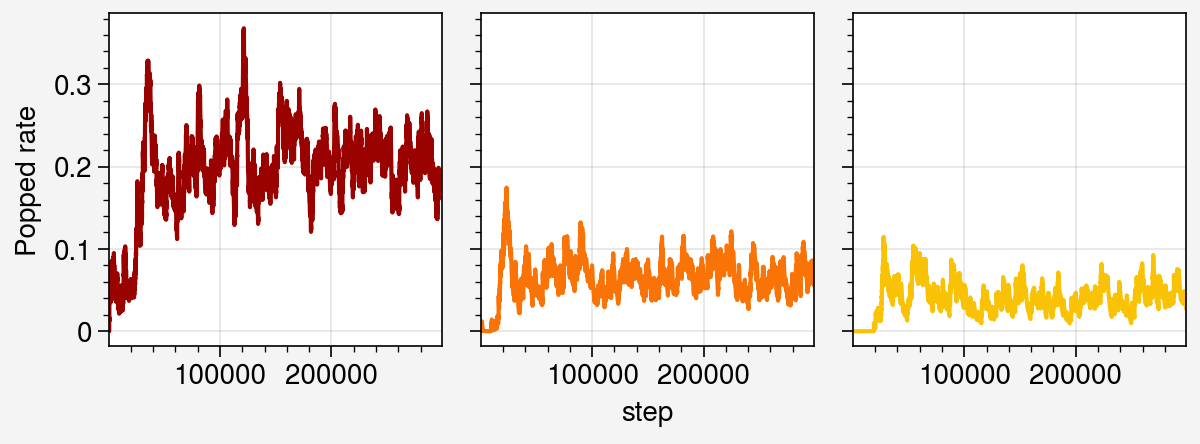

In [77]:
colors = [0, 1, 2]
fig, ax = pplt.subplots(ncols=len(colors), figwidth=6)
metric_df = df.set_index(['metric', 'step'])
color_df = metric_df.loc['bart/color']

metric = 'bart/popped'
for i, color in enumerate(colors):
    plot_metric = metric_df.loc[metric][color_df['value'] == color]
    # ax[i].plot(plot_metric)
    ax[i].plot(plot_metric.index, plot_metric.value.ewm(alpha=0.01).mean(),
               c=bart_plot_colors[i])
ax.format(ylabel='Popped rate')
    

In [87]:
def plot_bart_behaviors(df, metrics=['size', 'popped']):
    colors = [0, 1, 2]
    bart_metrics = {
        'size': {'df_metric': 'bart/size', 'label': 'Inflation size'},
        'popped': {'df_metric': 'bart/popped', 'label': 'Popped rate'}
    }

    fig, ax = pplt.subplots(nrows=len(metrics), ncols=len(colors), 
                            figwidth=6)

    metric_df = df.set_index(['metric', 'step'])
    color_df = metric_df.loc['bart/color']
    leftlabels = []
    for i, metric in enumerate(metrics):
        df_metric = bart_metrics[metric]['df_metric']
        leftlabels.append(bart_metrics[metric]['label'])
        for j, color in enumerate(colors):
            plot_metric = metric_df.loc[df_metric][color_df['value'] == color]
            ax[i, j].plot(plot_metric.index, 
                        plot_metric.value.ewm(alpha=0.01).mean(),
                        c=bart_plot_colors[j])
    ax.format(leftlabels=leftlabels, ylabel='')

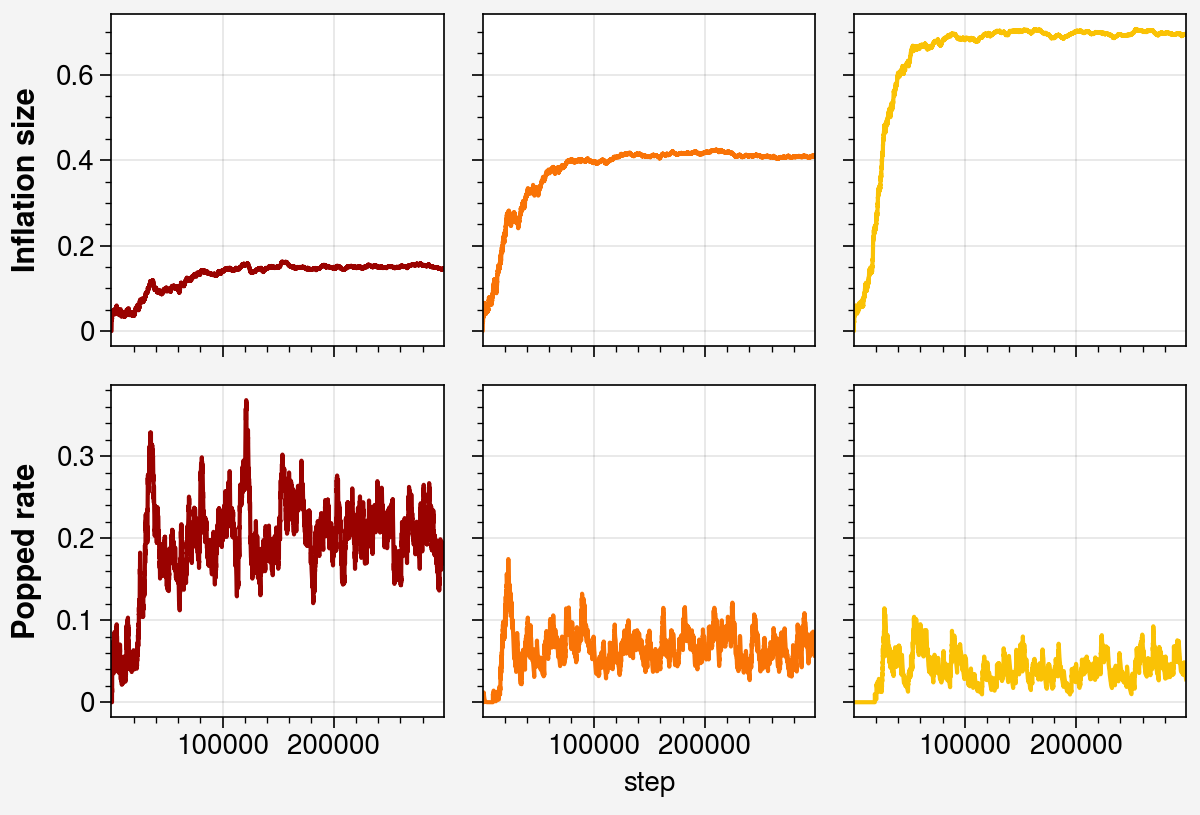

In [88]:
plot_bart_behaviors(df)

In [21]:
metric_df = df.set_index(['metric', 'step'])
color_df = metric_df.loc['bart/color']
color_df[color_df['value'] == 0]
metric_df.loc['bart/size'][color_df['value'] == 0]
